# Plot Overview of BTs

A 2x2 overview table for 10.8 $\mu$m brightness temperatures is plotted. 

We used colors that resemble the natural-color RGB: 
* black for ocean, 
* white for shallow clouds and 
* cyan for high clouds, e.g. cirrus

In [1]:
%matplotlib inline

import glob, os
import numpy as np
import pylab as pl
import xarray as xr
import datetime

#import seaborn as sns
#sns.set_context( 'talk' )

In [18]:
import nawdex_analysis.io.input_lev2 as input_lev2
from tropy.standard_config import local_data_path
import tropy.plotting_tools.colormaps
from mpl_toolkits.basemap import Basemap


In [19]:
pl.rcParams['figure.figsize'] = (16.0, 12.0)
pl.rcParams['font.size'] = 16.0

## Subsampling for Speedup

In [20]:
def subsamp2d( d, nsub = 4 ):
    
    dsub = {}
    for k in d.keys():
        
        v = d[k]

        try:
            if np.ndim(v) == 2:
                vsub = v[::nsub, ::nsub]
        except:
            vsub = v
            print '%s not an 2d array?' % k
            
        dsub[k] = vsub
        
    return dsub
        

## Make a Filelist

In [21]:
# version = 'v2019-10-18'
# version = 'v2020-02-13'
version = 'v2020-06-08'


In [22]:
# old path
fdir = '%s/icon/hdcp2_atlantic_stochconv_main_experiments' % local_data_path

In [23]:
# new path
fdir = '%s/icon/stoch_exp_%s' % (local_data_path, version )

In [8]:
flist = sorted( glob.glob( '%s/[sm]*-hdcp2_atlantic*nc' % fdir) )

In [9]:
for i, fname in enumerate( flist ):
    print(i, fname )

(0, '/vols/fs1/store/senf/data/icon/stoch_exp_v2020-06-08/msevi-hdcp2_atlantic-20131220.nc')
(1, '/vols/fs1/store/senf/data/icon/stoch_exp_v2020-06-08/synsat-hdcp2_atlantic_detconv.nc')
(2, '/vols/fs1/store/senf/data/icon/stoch_exp_v2020-06-08/synsat-hdcp2_atlantic_detconv_nolim_notundepth.nc')
(3, '/vols/fs1/store/senf/data/icon/stoch_exp_v2020-06-08/synsat-hdcp2_atlantic_noconv.nc')
(4, '/vols/fs1/store/senf/data/icon/stoch_exp_v2020-06-08/synsat-hdcp2_atlantic_stochconv_noconvprec_notundepth.nc')
(5, '/vols/fs1/store/senf/data/icon/stoch_exp_v2020-06-08/synsat-hdcp2_atlantic_stochconv_vervel_-00.nc')


## Input BTs

In [10]:
time = datetime.datetime(2013, 12, 20, 12, 0)

b108stack = {}
b062stack = {}

for fname in flist:
        basename = os.path.basename( fname )
        b108stack[basename] = input_lev2.read_data_field( fname, time, 'bt108')
        b062stack[basename] = input_lev2.read_data_field( fname, time, 'bt062')


.. open  /vols/fs1/store/senf/data/icon/nawdex//region_masks_for_msevi_nawdex.h5
.. open  /vols/fs1/store/senf/data/icon/nawdex//region_masks_for_msevi_nawdex.h5
.. open  /vols/fs1/store/senf/data/icon/nawdex//region_masks_for_msevi_nawdex.h5
.. open  /vols/fs1/store/senf/data/icon/nawdex//region_masks_for_msevi_nawdex.h5
.. open  /vols/fs1/store/senf/data/icon/nawdex//region_masks_for_msevi_nawdex.h5
.. open  /vols/fs1/store/senf/data/icon/nawdex//region_masks_for_msevi_nawdex.h5
.. open  /vols/fs1/store/senf/data/icon/nawdex//region_masks_for_msevi_nawdex.h5
.. open  /vols/fs1/store/senf/data/icon/nawdex//region_masks_for_msevi_nawdex.h5
.. open  /vols/fs1/store/senf/data/icon/nawdex//region_masks_for_msevi_nawdex.h5
.. open  /vols/fs1/store/senf/data/icon/nawdex//region_masks_for_msevi_nawdex.h5
.. open  /vols/fs1/store/senf/data/icon/nawdex//region_masks_for_msevi_nawdex.h5
.. open  /vols/fs1/store/senf/data/icon/nawdex//region_masks_for_msevi_nawdex.h5


## Reset Mask

In [11]:
o = np.ones_like( b108stack[basename]['lon'] ).astype(np.bool)
for basename in b108stack.keys():
    b108stack[basename]['mask'] = o
    b062stack[basename]['mask'] = o


### Sort Exp a bit

In [12]:
if version == 'v2019-10-18':
    ilist = [0, 2, 1, 5, 6 ]
elif version == 'v2020-02-13':
    ilist = [0, 2, 1, 3, 4]
elif version == 'v2020-06-08':
   #  ilist = [0, 3, 2, 4]
    ilist = [0, 3, 1, 4]
    
    

sorted_fnames = np.array(sorted( b108stack ))[ilist]

In [13]:
sorted_fnames

array(['msevi-hdcp2_atlantic-20131220.nc',
       'synsat-hdcp2_atlantic_noconv.nc',
       'synsat-hdcp2_atlantic_detconv.nc',
       'synsat-hdcp2_atlantic_stochconv_noconvprec_notundepth.nc'],
      dtype='|S56')

In [14]:
if version == 'v2020-06-08':
    # labels = ['SEVIRI', 'NOCONV', 'D-NOMFL', 'S-NOMFL']
    labels = ['SEVIRI', 'NOCONV', 'D-OPER', 'S-NOMFL']
    
else:
    labels = ['SEVIRI', 'NOCONV', 'D-OPER', 'S-DFLT', 'S-CPLN']

### Subsampling

In [15]:
if False: # True:
    for fname in sorted_fnames:
#        b108stack[fname] = subsamp2d( b108stack[fname], nsub = 6 )
#        b062stack[fname] = subsamp2d( b062stack[fname], nsub = 6 )
        b108stack[fname] = subsamp2d( b108stack[fname], nsub = 4 )
        b062stack[fname] = subsamp2d( b062stack[fname], nsub = 4 )
    

In [16]:
for fname in sorted_fnames:
    for fname2 in sorted_fnames:
        print fname, fname2, (b108stack[fname]['bt108'] - b108stack[fname2]['bt108']).std()
        
    print 

msevi-hdcp2_atlantic-20131220.nc msevi-hdcp2_atlantic-20131220.nc 0.0
msevi-hdcp2_atlantic-20131220.nc synsat-hdcp2_atlantic_noconv.nc 14.229379902396266
msevi-hdcp2_atlantic-20131220.nc synsat-hdcp2_atlantic_detconv.nc 14.148860913748564
msevi-hdcp2_atlantic-20131220.nc synsat-hdcp2_atlantic_stochconv_noconvprec_notundepth.nc 15.00400849020669

synsat-hdcp2_atlantic_noconv.nc msevi-hdcp2_atlantic-20131220.nc 14.229379902396266
synsat-hdcp2_atlantic_noconv.nc synsat-hdcp2_atlantic_noconv.nc 0.0
synsat-hdcp2_atlantic_noconv.nc synsat-hdcp2_atlantic_detconv.nc 5.891775917931789
synsat-hdcp2_atlantic_noconv.nc synsat-hdcp2_atlantic_stochconv_noconvprec_notundepth.nc 12.723108156251286

synsat-hdcp2_atlantic_detconv.nc msevi-hdcp2_atlantic-20131220.nc 14.148860913748564
synsat-hdcp2_atlantic_detconv.nc synsat-hdcp2_atlantic_noconv.nc 5.891775917931789
synsat-hdcp2_atlantic_detconv.nc synsat-hdcp2_atlantic_detconv.nc 0.0
synsat-hdcp2_atlantic_detconv.nc synsat-hdcp2_atlantic_stochconv_nocon

## Plot BT Matrix

### Prepare the Map with Basemap

In [24]:
m = Basemap(projection='mill',
                     llcrnrlat = -10,
                     urcrnrlat = 20,
                     llcrnrlon = -65,
                     urcrnrlon = 15,
                     resolution='i')
    

### Panel 2 x 2

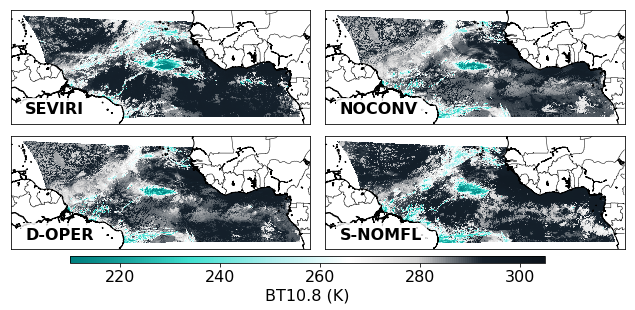

In [25]:
fig, axs = pl.subplots( nrows = 2, ncols = 2, figsize = (11, 5), sharex = True, sharey = True )
axs = axs.flatten()

labs = labels
color = 'gold'
cmap = tropy.plotting_tools.colormaps.nice_cmaps('ocean-clouds')

x,y = m( b108stack[basename]['lon'], b108stack[basename]['lat'])

sorted_fnames = list ( sorted_fnames )

for i, basename in enumerate( sorted_fnames ):
    
    if basename == 'empty':
        axs[i].axis('off')
        continue

    pl.sca( axs[i] )
    m.drawcoastlines()
    m.drawcountries()
    m.pcolormesh( x, y, b108stack[basename]['bt108'], cmap = cmap, vmin = 210, vmax = 305 )
    m.drawlsmask(ocean_color = [0,0,0,0], land_color = 'white', zorder = 1)

    axs[i].text(4.3e5, 2e5,  labs[i], va = 'bottom', ha = 'left', fontweight = 'bold' , 
                      bbox = dict(facecolor='white', edgecolor = 'white', alpha=0.8))

#    if i >= 0:
#        break
        

pl.subplots_adjust( hspace = 0.05, wspace = 0.05, bottom = 0.2)

clabs = [np.arange(200,320,20), np.arange(200,270,10)]

apos = axs[-1].get_position()
cax = fig.add_axes([0.2, apos.y0 - 0.03, 0.6, 0.02])
cbar = pl.colorbar(axs[0].collections[-1], cax, orientation = 'horizontal', ticks = clabs[0], )
pl.figtext(0.5, 0.08, 'BT10.8 (K)', ha = 'center', va = 'center')

pl.savefig('../pics/overview_BT108_natcol_%s.jpg' % version, dpi = 300)